In [11]:
#April 11, 2023

#Prediction of iCa status from chemistry panel. Classification question with three classifications -1 = hypocalcemia (iCa < 1.3), 0 = normocalcemic (iCa 1.3-1.45), or 1 = hypercalcemic (iCa>1.45)
#This data set has 5436 samples, many had total calcium missing, so those were dropped from the database

import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/krystlereagan/Documents/Documents/Research_Projects/AI/HyperCa - Keller/Data/iCa Prediction_4.11.23.csv')
pd.options.display.max_columns = None
data

,Calcium classification,Ionized Calcium,Anion Gap,Sodium,Potassium,Chloride,HCO3,Phosphorus,Calcium,BUN,Creatinine,Glucose,Total Protein,Albumin,Globulin,ALT,AST,Creatine Kinase,Alkaline Phosphatase,GGT,Cholesterol,Bilirubin Total,Lipemic Index,Hemolysis Index,Icteric Index
0,0,1.35,15,150,4.2,111,28,3.9,9.9,16,1.3,104,5.3,3.1,2.2,54,32,65,27,3,195,0.2,19.0,0.0,0.0
1,0,1.34,20,155,3.6,117,22,4.5,10.5,33,1.5,143,5.0,3.0,2.0,261,2232,61131,42,0,321,0.4,5.0,92.0,0.0
2,-1,1.12,22,132,3.0,79,34,3.7,9.5,39,1.2,172,6.5,3.9,2.6,62,30,509,80,4,335,0.2,11.0,47.0,0.0
3,-1,1.14,23,153,4.2,118,16,14.2,10.4,131,6.9,110,4.5,2.5,2.0,34,127,1503,18,0,295,0.3,0.0,25.0,0.0
4,-1,1.05,20,144,4.7,105,24,3.6,10.5,15,0.7,539,6.3,3.7,2.6,306,229,452,701,4,342,0.3,17.0,57.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,-1,1.24,17,146,3.7,113,20,3.7,10.0,15,0.8,95,5.6,3.5,2.1,36,22,126,9,3,160,0.2,4.0,42.0,0.0
5432,0,1.42,18,147,4.2,114,19,3.3,11.0,19,1.0,88,5.5,3.5,2.0,19,16,83,64,0,206,0.1,31.0,77.0,0.0
5433,0,1.39,27,149,4.5,111,16,2.5,11.6,8,1.0,105,6.3,3.8,2.5,51,40,176,1051,0,248,0.2,69.0,462.0,0.0
5434,0,1.33,21,144,4.2,109,18,5.0,9.6,15,0.9,115,5.0,2.4,2.6,45,30,260,144,1,289,0.2,9.0,24.0,0.0


In [12]:
from pycaret.classification import * 


In [13]:
#Include all features and fix classification imbalance
#exp1_clf = setup(data, target='Calcium classification', fix_imbalance = True)
exp1_clf = setup(data, target='Calcium classification', fix_imbalance = True, ignore_features =['Ionized Calcium'])

,Description,Value
0,session_id,2712
1,Target,Calcium classification
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(5436, 25)"
5,Missing Values,True
6,Numeric Features,23
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6904,0.8104,0.6954,0.6975,0.6907,0.4771,0.4803,0.4500
catboost,CatBoost Classifier,0.6867,0.8081,0.6900,0.6914,0.6872,0.4698,0.4716,4.2130
lightgbm,Light Gradient Boosting Machine,0.6849,0.8093,0.6875,0.6900,0.6853,0.4658,0.4679,0.0870
rf,Random Forest Classifier,0.6812,0.7949,0.6877,0.6851,0.6817,0.4603,0.4617,0.1590
xgboost,Extreme Gradient Boosting,0.6738,0.7995,0.6786,0.6785,0.6745,0.4460,0.4476,0.3170
et,Extra Trees Classifier,0.6733,0.7840,0.6738,0.6767,0.6738,0.4454,0.4463,0.1190
lda,Linear Discriminant Analysis,0.6568,0.7776,0.6618,0.6654,0.6572,0.4232,0.4266,0.0070
ada,Ada Boost Classifier,0.6544,0.6711,0.6700,0.6603,0.6549,0.4219,0.4238,0.0400
ridge,Ridge Classifier,0.6247,0.0000,0.6552,0.6321,0.6243,0.3847,0.3869,0.0080
dt,Decision Tree Classifier,0.5824,0.6475,0.5957,0.5846,0.5820,0.3046,0.3053,0.0130


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2712, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7165,0.8392,0.7223,0.7230,0.7172,0.5224,0.5252
1,0.7034,0.8200,0.7245,0.7113,0.7038,0.5011,0.5048
2,0.6824,0.8069,0.6729,0.6892,0.6829,0.4626,0.4655
3,0.6850,0.8207,0.7103,0.6855,0.6849,0.4712,0.4715
4,0.7375,0.8313,0.7318,0.7405,0.7380,0.5543,0.5553
5,0.6763,0.7808,0.6847,0.6872,0.6765,0.4559,0.4608
6,0.6921,0.8134,0.6744,0.7021,0.6924,0.4771,0.4819
7,0.6474,0.7950,0.6585,0.6521,0.6476,0.4070,0.4089
8,0.6658,0.7854,0.6789,0.6811,0.6656,0.4345,0.4423
9,0.6974,0.8113,0.6959,0.7031,0.6984,0.4849,0.4865


In [19]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7165,0.8294,0.7222,0.7208,0.7169,0.5223,0.5242
1,0.6877,0.8167,0.7008,0.6958,0.6879,0.4708,0.4748
2,0.6824,0.8052,0.6726,0.6861,0.6830,0.4623,0.4636
3,0.6903,0.8197,0.7079,0.6898,0.6897,0.4789,0.4791
4,0.7192,0.8399,0.7299,0.7213,0.7196,0.5265,0.5272
5,0.6553,0.7755,0.6627,0.6641,0.6559,0.4204,0.4238
6,0.7026,0.8058,0.6822,0.7161,0.7041,0.4981,0.5036
7,0.6579,0.7869,0.6720,0.6610,0.6586,0.4236,0.4243
8,0.6500,0.7740,0.6664,0.6567,0.6512,0.4062,0.4082
9,0.6974,0.8065,0.6901,0.7045,0.6979,0.4866,0.4898


In [18]:
predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6922,0.8162,0.6936,0.6975,0.6930,0.4820,0.4838


,Anion Gap,Sodium,Potassium,Chloride,HCO3,Phosphorus,Calcium,BUN,Creatinine,Glucose,...,Alkaline Phosphatase,GGT,Cholesterol,Bilirubin Total,Lipemic Index,Hemolysis Index,Icteric Index,Calcium classification,Label,Score
0,27.0,144.0,4.3,102.0,19.0,4.5,9.9,21.0,0.9,66.0,...,126.0,0.0,203.0,0.2,8.0,97.0,0.0,-1,0,0.4829
1,22.0,150.0,4.8,111.0,22.0,4.9,10.1,12.0,0.6,99.0,...,50.0,0.0,128.0,0.2,7.0,83.0,0.0,0,0,0.3807
2,23.0,146.0,4.1,107.0,20.0,7.0,11.3,69.0,2.9,108.0,...,25.0,0.0,139.0,0.2,7.0,42.0,0.0,-1,0,0.1687
3,18.0,153.0,4.0,121.0,18.0,2.8,8.2,4.0,0.5,80.0,...,1095.0,34.0,143.0,6.9,8.0,11.0,9.0,-1,-1,0.0417
4,14.0,146.0,3.3,116.0,19.0,3.6,8.6,6.0,0.6,87.0,...,1345.0,14.0,164.0,1.4,13.0,0.0,2.0,0,0,0.4314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,21.0,147.0,4.6,109.0,22.0,2.1,12.2,14.0,0.7,96.0,...,21.0,0.0,192.0,0.2,4.0,56.0,0.0,1,1,0.2199
1627,20.0,146.0,3.8,110.0,20.0,3.9,9.2,7.0,0.5,77.0,...,21.0,0.0,194.0,0.2,4.0,125.0,0.0,-1,0,0.3360
1628,27.0,144.0,3.5,107.0,14.0,7.0,9.7,35.0,0.9,115.0,...,229.0,11.0,315.0,0.1,37.0,79.0,0.0,-1,-1,0.0130
1629,19.0,152.0,4.3,110.0,27.0,4.6,10.5,23.0,0.8,102.0,...,221.0,1.0,178.0,0.1,5.0,65.0,0.0,0,-1,0.0392


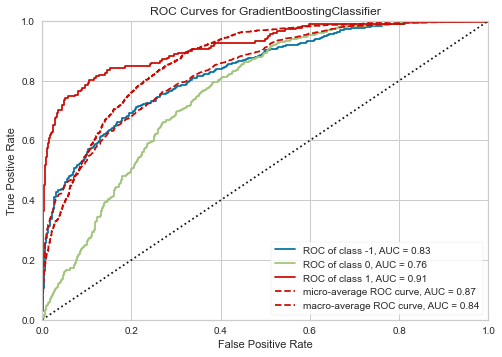

In [20]:
plot_model(tuned_gbc)

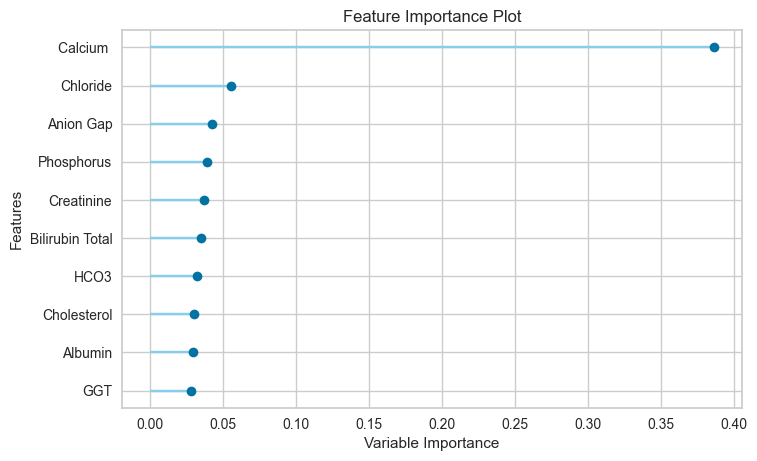

In [21]:
plot_model(tuned_gbc, plot='feature')